# Umjetni neuroni

Za primjere ćemo koristiti [**Iris dataset**](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

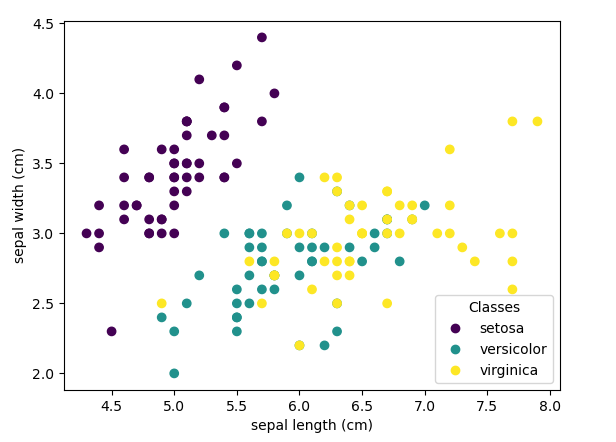

- učitavamo potrebne biblioteke
  - numpy
  - sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# from sklearn.preprocessing import StandardScaler

# Učitavanje Iris dataseta
iris = load_iris()
X = iris.data[:100, [0, 2]]  # Promatrati ćemo samo vrijednosti iz stupaca 0 i 2 za prvh 100 redaka skupa podataka
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Prilagodimo oznake za binarnu klasifikaciju


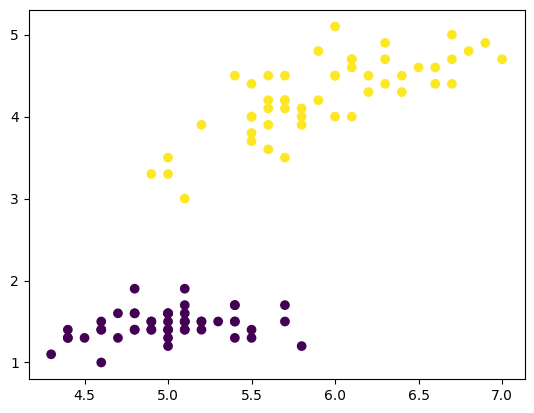

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
# Za prikaz podataka u tabličnom obliku
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Perceptron

Koristiti ćemo implementaciju Perceptrona dostupnu na [**linku**](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#implementing-the-perceptron-rule-in-python) u demonstrativne svrhe.

In [4]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta # Stopa učenja
        self.epochs = epochs # Broj epoha

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1]) # Inicijalizacija težina
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Trenirano Perceptron model 10 epoha sa learning rate 0.1

In [5]:
# Instanciranje Perceptron objekta/modela
ppn = Perceptron(epochs=10, eta=0.1)
ppn.train(X, y)

Promotrimo predikcije perceptrona:

In [6]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## ADALINE

### ADALINE raw

Koristiti ćemo implementaciju ADALINE umjetnog neurona prema [izvoru](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#the-gradient-descent-rule-in-action).

In [7]:
import numpy as np

class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)



Kako bismo ujednačili utjecaj primjeraka za treniranje, nad njima radimo standardizaciju.

In [36]:
# Standardizacija
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# # Alternativni način sa gotovom funkcijom
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_std_lib = scaler.fit_transform(X)

# assert np.array_equal(X_std, X_std_lib) # provjera

ada = AdalineGD(epochs=10, eta=0.01)
ada.train(X_std, y)

In [37]:
ada.predict(X_std)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### ADALINE Keras

Implementirajmo ADALINE umjetni neuron pomoću end-to-end platforme otvorenog koda za strojno učenje za sve [Tensorflow](https://www.tensorflow.org/) te [Keras](https://keras.io/) API-ja dizajniranog za ljudska bića.

In [50]:
import numpy as np
import tensorflow as tf

# Definiramo model
ada_keras = tf.keras.Sequential([
    tf.keras.layers.Dense(
        1,
        input_shape=(X_std.shape[1],),
        activation='linear',
        use_bias=True
        )
])

# Optimizacijski algoritam
learning_rate = 0.01  # Definirajmo learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # Definirajmo optimizer

# Loss/Cost funkcija
y_f = y.astype(np.float32)

def custom_cost(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = tf.square(errors)
    return tf.reduce_sum(squared_errors) / tf.constant(2.0)

loss = tf.function(custom_cost)

# Kompilirajmo model
ada_keras.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

# Treniranje modela
ada_keras.fit(X_std, y_f, epochs=10, batch_size=1, verbose=0)

# Evaluacija modela
loss, accuracy = ada_keras.evaluate(X_std, y_f)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Wrapper za model -> output na -1 i 1
class ada_keras_wrapper(object):

    def __init__(self, model):
        self.model = model

    def net_input(self, X):
        return self.model.predict(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

4/4 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.4600
Accuracy: 46.00%


In [51]:
ada_keras.predict(X_std)

4/4 [==============================] - 0s 4ms/step


array([[-1.0307487 ],
       [-0.9795189 ],
       [-1.0052105 ],
       [-0.82575274],
       [-1.0051339 ],
       [-0.87682927],
       [-0.9026741 ],
       [-0.92821246],
       [-0.8514441 ],
       [-0.90259755],
       [-1.0306723 ],
       [-0.8000611 ],
       [-0.9539039 ],
       [-1.0565937 ],
       [-1.3638965 ],
       [-1.1075171 ],
       [-1.1845152 ],
       [-1.0307487 ],
       [-0.95367414],
       [-0.95382744],
       [-0.87682927],
       [-0.95382744],
       [-1.2103602 ],
       [-0.79998446],
       [-0.56929666],
       [-0.851291  ],
       [-0.851291  ],
       [-0.97944236],
       [-1.0563637 ],
       [-0.7744462 ],
       [-0.8000611 ],
       [-1.0306723 ],
       [-0.97944236],
       [-1.1332085 ],
       [-0.90259755],
       [-1.1589769 ],
       [-1.2101301 ],
       [-0.9795189 ],
       [-0.9283657 ],
       [-0.95382744],
       [-1.0820554 ],
       [-0.9539807 ],
       [-0.9283657 ],
       [-0.851291  ],
       [-0.6461415 ],
       [-0

In [69]:
# Postavimo wrapper kako bismo kao izlaz dobivali 1 ili -1
ada_keras = ada_keras_wraper(ada_keras)

In [70]:
ada_keras.predict(X_std).shape

4/4 [==============================] - 0s 4ms/step


(100, 1)

## Vizualizacija

Weights: [-0.4  -0.68  1.82]


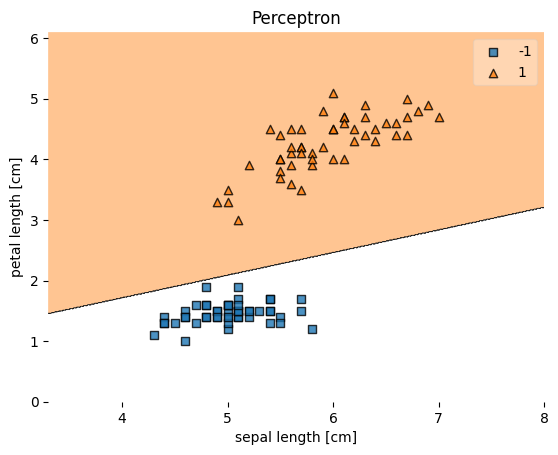

In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

Weights: [ 1.09912079e-16 -1.53845148e-01  9.73427113e-01]


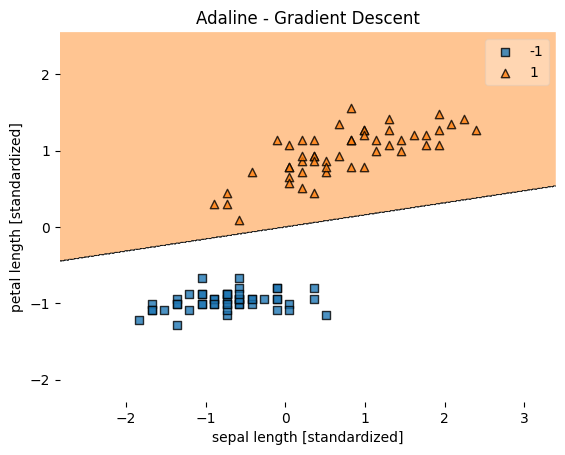

In [46]:
plot_decision_regions(X_std, y, clf=ada)
print('Weights: %s' % ada.w_)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

9600/9600 [==============================] - 16s 2ms/step
Weights:  [<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.16354677],
       [ 1.109425  ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00195764], dtype=float32)>]


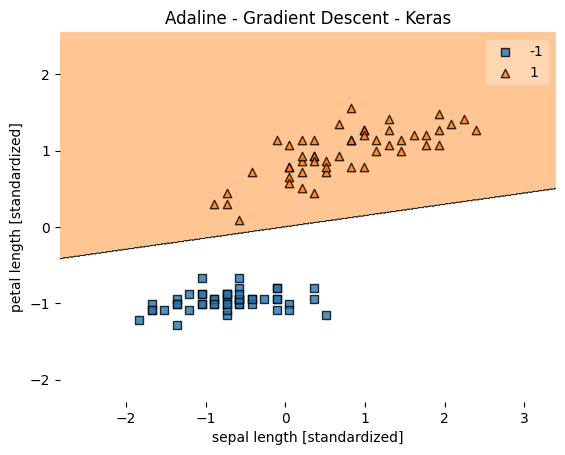

In [72]:
plot_decision_regions(X_std, y, clf=ada_keras)
print("Weights: ", ada_keras.model.weights)
plt.title('Adaline - Gradient Descent - Keras')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

## Skup podataka koji nije linearno separabilan

In [73]:
# Učitavanje Iris dataseta
iris = load_iris()
X_2 = iris.data[50:150, [0, 2]]  # Promatrati ćemo samo vrijednosti iz stupaca 0 i 2 za raspon redaka 50:150 skupa podataka
y_2 = iris.target[50:150]
y_2 = np.where(y == 1, -1, 1)  # Prilagodimo oznake za binarnu klasifikaciju

# Standardizacija
X_2_std = np.copy(X_2)
X_2_std[:,0] = (X_2[:,0] - X_2[:,0].mean()) / X_2[:,0].std()
X_2_std[:,1] = (X_2[:,1] - X_2[:,1].mean()) / X_2[:,1].std()

In [74]:
print(len(y_2))

100


### Perceptron

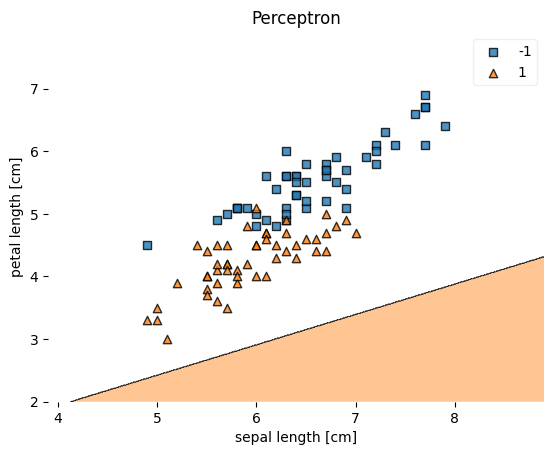

In [76]:
ppn2 = Perceptron(epochs=10, eta=0.1) # Isprobajte različiti broj epoha
ppn2.train(X_2, y_2)
plot_decision_regions(X_2, y_2, clf=ppn2)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

### ADALINE Keras

In [80]:
import numpy as np
import tensorflow as tf


# Definiramo model
ada_keras_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(
        2, # Dva neurona
        input_shape=(X_2_std.shape[1],),
        activation='sigmoid',
        use_bias=True
        )
])

# Optimizacijski algoritam
learning_rate = 0.01  # Definirajmo learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Loss/Cost funkcija
y_2_f = y_2.astype(np.float32)

def custom_cost(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = tf.square(errors)
    return tf.reduce_sum(squared_errors) / tf.constant(2.0)

loss = tf.function(custom_cost)

# Kompilirajmo model
ada_keras_2.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
    )

# Train the model
ada_keras_2.fit(X_2_std, y_2_f, epochs=10, batch_size=1, verbose=0)

# Evaluate the model
loss, accuracy = ada_keras_2.evaluate(X_2_std, y_2_f)
print(f"Accuracy: {accuracy * 100:.2f}%")


# Wrapper za model -> output na -1 i 1
class ada_keras_wrapper_2(object):

    def __init__(self, model):
        self.model = model

    def net_input(self, X):
        return self.model.predict(X)

    def predict(self, X): # Kada imamo po neuron na izlazu za svaku od 2 klase
        net_input_result = self.net_input(X)
        prediction = np.where(net_input_result[:, 0] - net_input_result[:, 1] > 0, -1, 1)
        return prediction.reshape(-1, 1)  # Reshape to [100, 1]

    # def predict(self, X): # Kada imamo jedna neuron za binarnu klasifikaciju
    #     return np.where(self.net_input(X) >= 0.5, -1, 1)

4/4 [==============================] - 0s 5ms/step - loss: 26.2468 - accuracy: 0.0100
Accuracy: 1.00%


In [81]:
# Postavljanje wrappera
ada_keras_2 = ada_keras_wrapper_2(ada_keras_2)

9600/9600 [==============================] - 28s 3ms/step


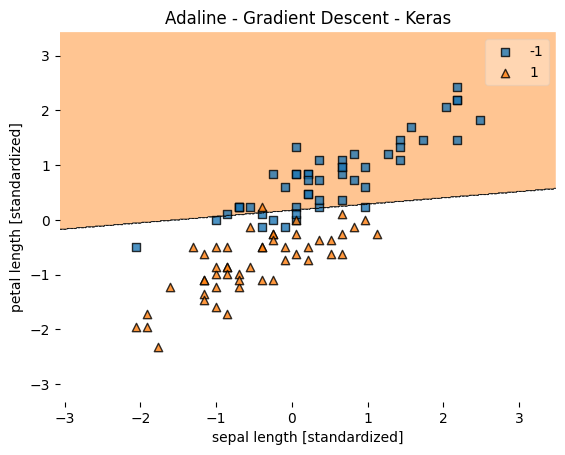

In [82]:
plot_decision_regions(X_2_std, y_2, clf=ada_keras_2)
plt.title('Adaline - Gradient Descent - Keras')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

**Zaključak: Neuronske mreže s 1 slojem nisu praktične za kompleksnije skupove koji nisu linearno separabilni.**

### Multi layer

Probajmo neuronsku mrežu s > 1 sloja.

In [86]:
import numpy as np
import tensorflow as tf

# Definiramo model
MLP = tf.keras.Sequential([
    tf.keras.layers.Dense(
        2,
        input_shape=(X_2_std.shape[1],),
        activation='relu',
        use_bias=True
        ),
    tf.keras.layers.Dense(
        1,
        activation='sigmoid',
        use_bias=True
        )
])

# Optimizacijski algoritam
learning_rate = 0.01  # Definirajmo learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # Define the optimizer

# Loss/Cost funkcija
y_2_f = y_2.astype(np.float32)

def custom_cost(y_true, y_pred):
    errors = y_true - y_pred
    squared_errors = tf.square(errors)
    return tf.reduce_sum(squared_errors) / tf.constant(2.0)

loss = tf.function(custom_cost)

# Kompilirajmo model
MLP.compile(
    optimizer=optimizer,
    loss="mse",
    metrics=['accuracy']
    )

# Train the model
MLP.fit(X_2_std, y_2_f, epochs=100, batch_size=1, verbose=0)

# Evaluate the model
loss, accuracy = MLP.evaluate(X_2_std, y_2_f)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Wrapper za model -> output na -1 i 1
class mlp_wrapper(object):

    def __init__(self, model):
        self.model = model

    def net_input(self, X):
        return self.model.predict(X)

    # def predict(self, X):
    #     net_input_result = self.net_input(X)
    #     prediction = np.where(net_input_result[:, 0] - net_input_result[:, 1] > 0, 1, -1)
    #     return prediction.reshape(-1, 1)  # Reshape to [100, 1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, -1, 1)

4/4 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.4600
Accuracy: 46.00%


9600/9600 [==============================] - 21s 2ms/step


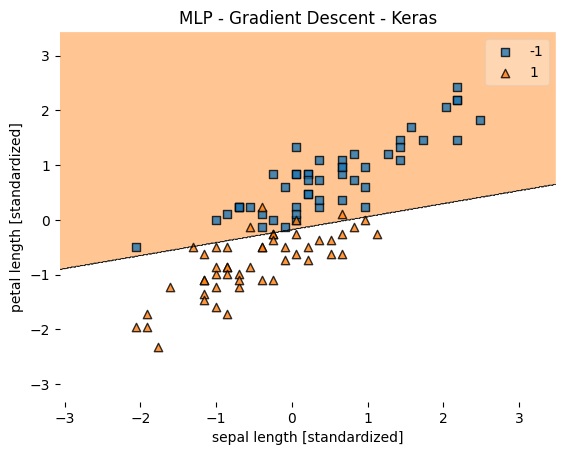

In [87]:
MLP = mlp_wrapper(MLP)
plot_decision_regions(X_2_std, y_2, clf=MLP)
plt.title('MLP - Gradient Descent - Keras')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()